In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [45]:
from graphs_module import Graph

### 1. A simple example of `graphs_module` Graph
#### 1.1 Directed graph 

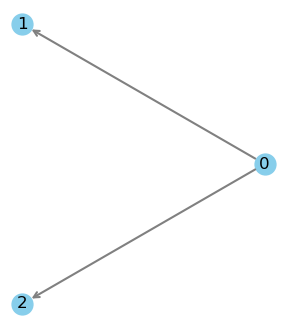

In [46]:
g = Graph() 
g.add_node(0)
g.add_node(1)
g.add_node(2)

g.add_edge(0, 1)
g.add_edge(0, 2)

fig, ax = g.plot(figsize=(4, 4));

#### 1.2 Bidirected graph 

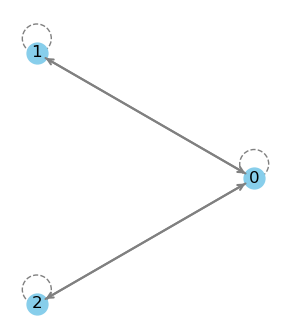

In [47]:
g = Graph(bidirected=True) 
g.add_node(0)
g.add_node(1)
g.add_node(2)

g.add_edge(0, 1)
g.add_edge(0, 2)

fig, ax = g.plot(figsize=(4, 4));

### 2. Random graphs from `graphs_module`

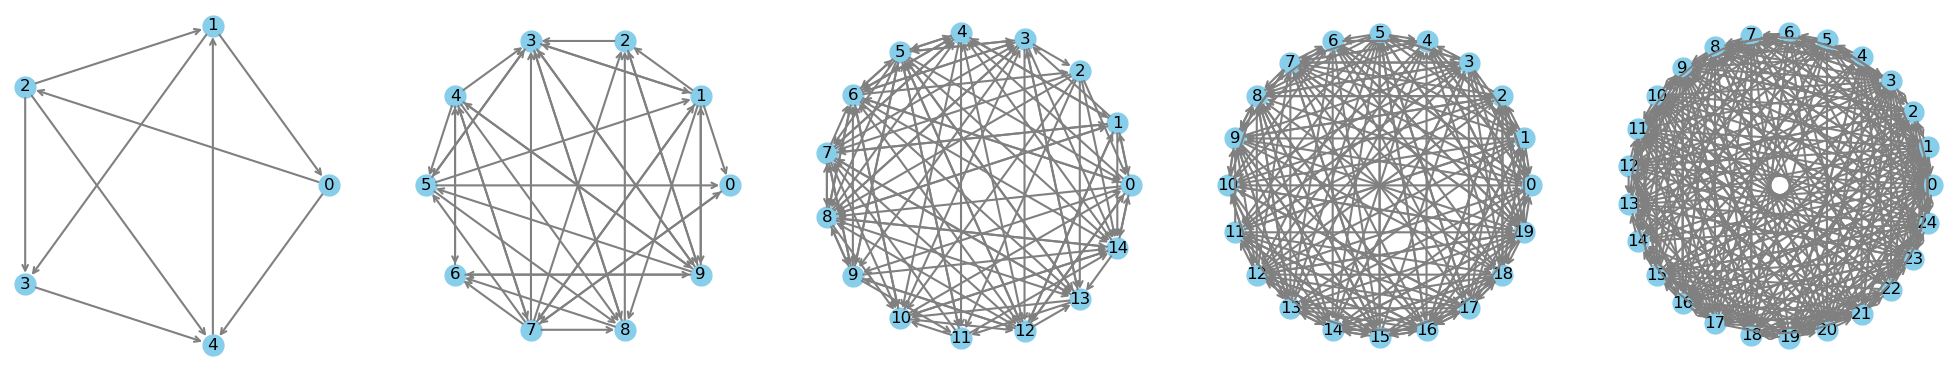

In [48]:
n_experiments = 5 

fig, ax = plt.subplots(1, n_experiments, figsize=(5 * n_experiments, 5));
for i in range(n_experiments):
    g = Graph()
    g.randomize(size=5 * (i + 1))
    g.edges

    ax[i].set_aspect('equal')
    ax[i].axis('off')
    g.plot(fig=fig, ax=ax[i])

### 3. Problem solution on random graphs from  `graphs_module`

In [49]:
def plot_solution(graph, nodes, fig=None, ax=None):
    if fig == ax == None:
        fig, ax = graph.plot()
    else:
        fig, ax = graph.plot(fig=fig, ax=ax)
    n_nodes = graph.__len__()
    
    angles = np.linspace(0, 2 * np.pi, n_nodes, endpoint=False)
    positions = np.array([(np.cos(a), np.sin(a)) for a in angles])

    for i, (x, y) in enumerate(positions):
        if i in nodes:
            ax.plot(x, y, 'o', markersize=15, color='lightpink')
            ax.text(x, y, str(i), fontsize=12, ha='center', va='center')
        
    return fig, ax

Original problem is NP-hard and requires some heuristics for building a fast solution. Let's use classical $O(N^2)$ baseline instead 

In [50]:
def is_independent_set(graph: Graph, nodes):
    for i in nodes:
        for j in nodes:
            if i != j and graph.edges[i, j] == 1:
                return False
    return True

def baseline(graph: Graph):
    n = len(graph)
    nodes = list(range(n))

    for r in range(n, 0, -1):
        for subset in itertools.combinations(nodes, r):
            if is_independent_set(graph, subset):
                return list(subset)
    return []

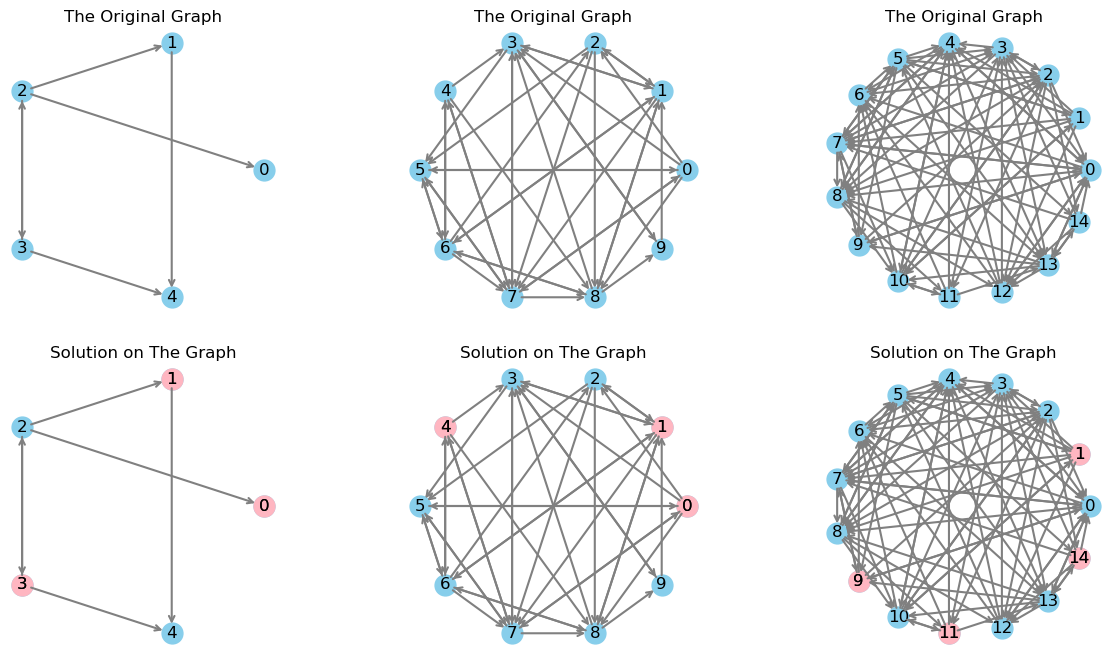

In [51]:
n_experiments = 3 

fig, ax = plt.subplots(2, n_experiments, figsize=(5 * n_experiments, 8));

experiment_edges = []
experiment_solutions = []

for i in range(n_experiments):
    g = Graph()
    g.randomize(size=5 * (i + 1))
    experiment_edges.append(g.edges)

    ax[0, i].set_aspect('equal')
    ax[0, i].axis('off')
    ax[0, i].set_title('The Original Graph')

    ax[1, i].set_aspect('equal')
    ax[1, i].axis('off')
    ax[1, i].set_title('Solution on The Graph')

    g.plot(fig=fig, ax=ax[0, i])
    solution_nodes = baseline(g)
    experiment_solutions.append(solution_nodes)
    plot_solution(g, solution_nodes, fig, ax=ax[1, i]);

In [52]:
experiment_solutions

[[0, 1, 3], [0, 1, 4], [1, 9, 11, 14]]

In [53]:
pd.DataFrame({'Edges': experiment_edges,'Solution' : experiment_solutions}).to_csv('output.csv', index=False)